In [141]:
from pathlib import Path

import pandas as pd
import tarfile
import urllib.request

from attr import attributes
from sympy.abc import lamda, alpha


def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = ("https://github.com/ageron/data/raw/main/housing.tgz")
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as tar:
            tar.extractall(path="datasets")
        return pd.read_csv(Path("datasets/housing/housing.csv"))


housing_data = load_housing_data()



C:\Users\cohbe\AppData\Local\Temp\ipykernel_23204\2189785880.py:17: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path="datasets")


In [142]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [143]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [144]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [145]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


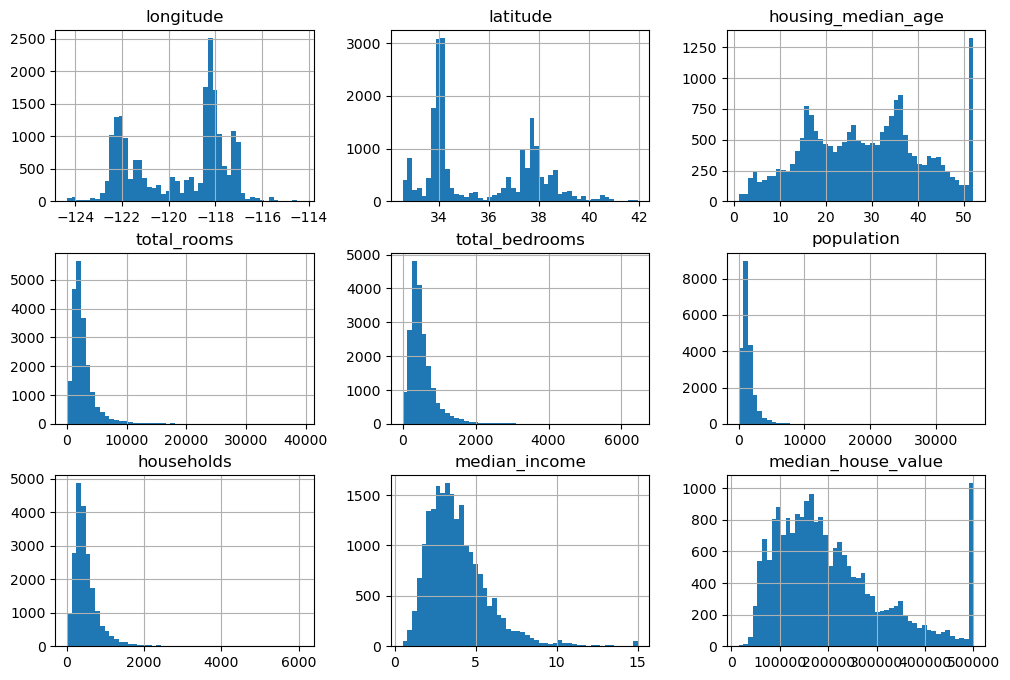

In [146]:
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(12, 8))
plt.show()


In [147]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffle_indices = np.random.permutation(np.arange(len(data)))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]


train, test = shuffle_and_split_data(housing_data, test_ratio=0.2)


In [148]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id):
    ids = data[id]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [149]:
housing_data_ided = housing_data.reset_index()
train, test = split_data_with_id_hash(housing_data_ided, 0.2, "index")

train.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [150]:
housing_data_ided["id"] = housing_data['longitude'] * 1000 + housing_data['latitude']
train, test = split_data_with_id_hash(housing_data_ided, 0.2, "index")



In [151]:
train

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [152]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1,2,3,4,5])



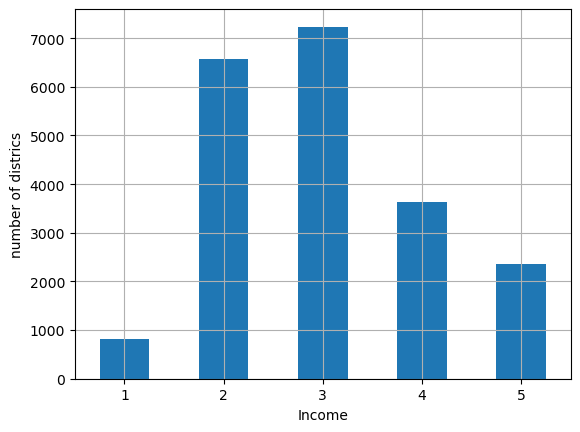

In [153]:
housing_data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income")
plt.ylabel("number of districs")
plt.show()


In [154]:
from sklearn.model_selection import StratifiedShuffleSplit
spliter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in spliter.split(housing_data, housing_data["income_cat"]):
    strat_train_set_n = housing_data.iloc[train_index]
    strat_test_set_n = housing_data.iloc[test_index]
    strat_splits.append((strat_train_set_n, strat_test_set_n))

train, test = strat_splits[0]

In [155]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


In [156]:
from sklearn.model_selection import train_test_split
strat_test_set, strat_train_set = train_test_split(
    housing_data, test_size=0.2, stratify=housing_data["income_cat"], random_state=42
)


In [157]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [158]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)



In [159]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY


In [160]:
housing = strat_train_set.copy()


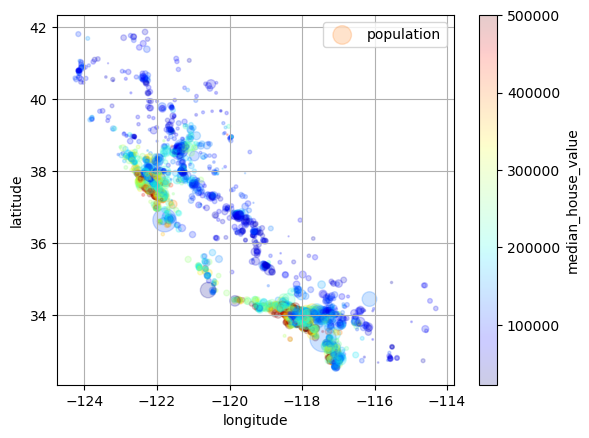

In [161]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True, grid=True)
plt.show()


In [163]:
#corr_matrix = housing.corr()

In [164]:
#corr_matrix["median_house_value"].sort_values(ascending=False)

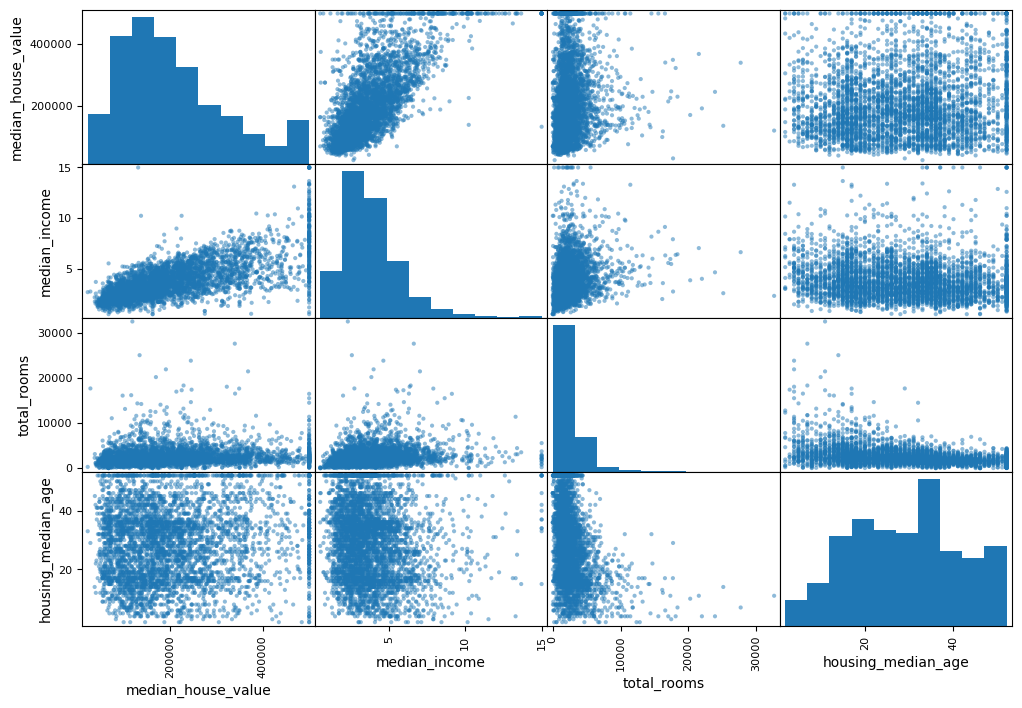

(None,)

In [165]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", 'total_rooms', "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show(),

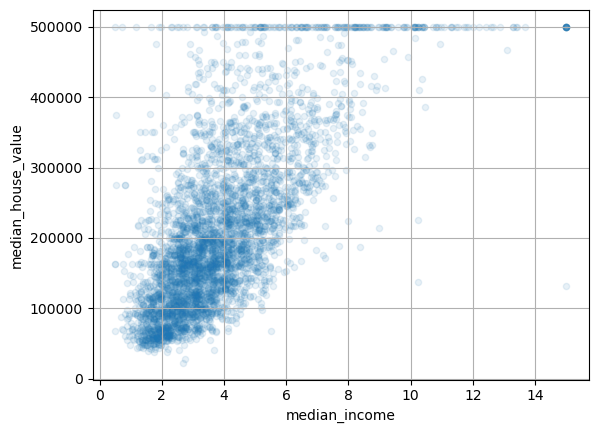

In [166]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)
plt.show()


In [167]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']

housing['people_per_house'] = housing['population'] / housing['households']
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,7.000000,0.149560,2.677419
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,5.841912,0.166772,2.955882
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3.935462,0.295858,1.421158
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,5.854054,0.195291,2.897297
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3.584184,0.366548,1.849490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,5.622921,0.196252,2.229205
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,4.343675,0.252198,2.706444
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,6.924242,0.160832,2.984848
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,5.339332,0.184401,3.825193


In [169]:
#corr_matrix = housing.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)

In [170]:
machinelearning_housing = strat_train_set.drop("median_house_value", axis=1)
machinelearning_housing_labels = strat_train_set["median_house_value"].copy()

machinelearning_housing_labels.head()

3905     397700.0
16821    202900.0
2900     310000.0
7193     314300.0
13928    187500.0
Name: median_house_value, dtype: float64

In [127]:
machinelearning_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,NEAR BAY
...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,NEAR BAY


In [171]:
median = housing['total_bedrooms'].median()

In [172]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,7.000000,0.149560,2.677419
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,5.841912,0.166772,2.955882
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3.935462,0.295858,1.421158
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,5.854054,0.195291,2.897297
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3.584184,0.366548,1.849490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,5.622921,0.196252,2.229205
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,4.343675,0.252198,2.706444
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,6.924242,0.160832,2.984848
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,5.339332,0.184401,3.825193


In [133]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,7.000000,0.149560,2.677419
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,5.841912,0.166772,2.955882
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,3.935462,0.295858,1.421158
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,5.854054,0.195291,2.897297
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,3.584184,0.366548,1.849490


In [173]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [174]:
imputer.statistics_

array([-1.18460000e+02,  3.42300000e+01,  2.90000000e+01,  2.13750000e+03,
        4.38000000e+02,  1.16300000e+03,  4.12500000e+02,  3.52690000e+00,
        1.82150000e+05,  5.20132180e+00,  2.03584019e-01,  2.80271751e+00])

In [175]:
housing_num.median().values

array([-1.18460000e+02,  3.42300000e+01,  2.90000000e+01,  2.13750000e+03,
        4.38000000e+02,  1.16300000e+03,  4.12500000e+02,  3.52690000e+00,
        1.82150000e+05,  5.20132180e+00,  2.03584019e-01,  2.80271751e+00])

In [176]:
x = imputer.transform(housing_num)
x

array([[-121.95      ,   37.11      ,   21.        , ...,    7.        ,
           0.14956012,    2.67741935],
       [-118.01      ,   33.89      ,   36.        , ...,    5.84191176,
           0.16677155,    2.95588235],
       [-118.18      ,   33.74      ,   30.        , ...,    3.93546241,
           0.29585799,    1.42115768],
       ...,
       [-123.01      ,   38.67      ,   33.        , ...,    6.92424242,
           0.16083151,    2.98484848],
       [-122.03      ,   37.6       ,   24.        , ...,    5.33933162,
           0.18440058,    3.8251928 ],
       [-117.12      ,   32.74      ,   52.        , ...,    4.64386792,
           0.19756221,    2.06839623]])

In [177]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)


In [178]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,7.000000,0.149560,2.677419
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,5.841912,0.166772,2.955882
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,3.935462,0.295858,1.421158
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,5.854054,0.195291,2.897297
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,3.584184,0.366548,1.849490
...,...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,5.622921,0.196252,2.229205
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,4.343675,0.252198,2.706444
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,6.924242,0.160832,2.984848
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,5.339332,0.184401,3.825193


In [179]:
machinelearning_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,NEAR BAY
...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,NEAR BAY


In [180]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
3905,<1H OCEAN
16821,<1H OCEAN
2900,NEAR OCEAN
7193,NEAR OCEAN
13928,NEAR BAY


In [182]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [0.],
       [3.],
       [4.]])

In [183]:
housing_cat_encoded[:8]

array([[0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.]])

In [184]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [192]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [193]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [203]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [209]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<1H OCEAN", "ISLAND"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [205]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [206]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [207]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [211]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown))
df_output

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [216]:
columns=cat_encoder.get_feature_names_out()
index=df_test_unknown.index

In [217]:
index

RangeIndex(start=0, stop=2, step=1)

In [218]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max = min_max_scaler.fit_transform(housing_num)


In [220]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_scaler = std_scaler.fit_transform(housing_num)
housing_num_scaler

array([[-1.18804209,  0.69962912, -0.62700415, ...,  0.79958178,
        -1.07094425, -0.03227171],
       [ 0.76723335, -0.8005624 ,  0.56519904, ...,  0.22764638,
        -0.78494704, -0.0192847 ],
       [ 0.68286868, -0.8704471 ,  0.08831777, ..., -0.71387591,
         1.36004292, -0.09086148],
       ...,
       [-1.71408066,  1.42642999,  0.32675841, ...,  0.76216802,
        -0.88365096, -0.01793377],
       [-1.22774311,  0.92791914, -0.38856351, ..., -0.0205587 ,
        -0.49201093,  0.02125837],
       [ 1.20890725, -1.33634509,  1.83688246, ..., -0.36402157,
        -0.27330802, -0.06067545]])

In [223]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)


In [225]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(machinelearning_housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)

some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)


In [226]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[['median_income']], machinelearning_housing_labels)

predictions = model.predict(housing[['median_income']])


In [228]:
pd.DataFrame(predictions)

,0
0,368028.436839
1,240386.502560
2,218214.037294
3,219621.943555
4,197914.663691
...,...
4123,136567.824220
4124,124851.738787
4125,242531.295431
4126,237780.640972


In [231]:
from sklearn.preprocessing import FunctionTransformer
log_tranformed = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_tranformed.transform(housing[['population']])


In [235]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))

sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])


In [236]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True, with_std=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        x = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.n_features_ = X.shape[1]

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)

        assert self.n_features_in_ == X.shape[1]

        if self.with_mean:
            X = X - self.mean_

        return X / self.scale_


In [237]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

